### Educational Attainment of LA Out Migrators

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
file.EDUC.unique()

array([ 7,  2,  3,  1,  0,  6, 10, 11,  4,  5,  8], dtype=int64)

In [4]:
file.EDUC_DESC.unique()

array(['1 year of college', 'Grade 5, 6, 7, or 8', 'Grade 9',
       'Nursery school to grade 4', 'N/A or no schooling', 'Grade 12',
       '4 years of college', '5+ years of college', 'Grade 10',
       'Grade 11', '2 years of college'], dtype=object)

In [5]:
#Renaming & combining some labels from EDUC_DESC
education = {
0:'N/A or no schooling',
1:'Nursery school to grade 4',
2:'Grade 5, 6, 7, or 8',
3:'Some high school',
4:'Some high school',
5:'Some high school',
6:'HS diploma',
7:'Some college',
8:'Some college',
9:'Some college',
10:"College diploma",
11:'Graduate school'}

file.EDUC_DESC = file.EDUC.map(education)

In [6]:
#Extracting annual migration counts for each education level
educ = {}
for year in range(2006,2018):
    df = file[file.YEAR == year]
    categories = file.EDUC_DESC.unique()
    counts = {}
    for category in categories:
        count = df.PERWT[df.EDUC_DESC == category].sum()
        counts[category] = count
    educ[year] = counts

In [7]:
#Creating data frame for plotting
level = pd.DataFrame()
for year in educ:
    df = pd.DataFrame.from_dict(educ[year], orient='index')
    df = df.reset_index()
    yr = np.full(8, str(year))
    df['Year'] = pd.to_datetime(yr)
    level = pd.concat([level, df], sort=True)
level = level.reset_index(drop=True)
level = level.rename({'index':'Education Level', 0:'Count'}, axis=1)

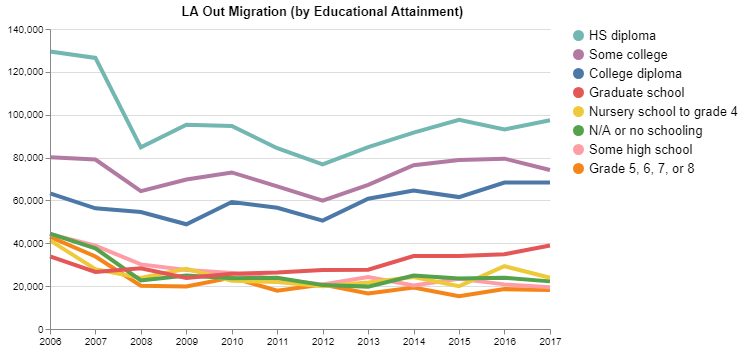

In [9]:
#Plotting via Altair
alt.Chart(level).mark_line(strokeWidth=4).encode(
    x=alt.X('year(Year)', 
            title=None, 
            axis=alt.Axis(labelFlush=False, grid=False)), 
    y=alt.Y('Count', 
            title=None, 
            scale=alt.Scale(domain=(0,140000))), 
    color=alt.Color('Education Level', 
                    title=None, 
                    legend=alt.Legend(values=['HS diploma', 'Some college', "College diploma", 'Graduate school', 
                                              'Nursery school to grade 4', 'N/A or no schooling', 'Some high school', 'Grade 5, 6, 7, or 8']))
).properties(width=500, title='LA Out Migration (by Educational Attainment)                            '
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)